In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/datetime_per_area/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(81)]

In [4]:
def show_evaluation(y, y_pred):
    AE = np.sum(np.abs(y-y_pred))
    print('AE', AE)
    MAE = np.mean(np.abs(y-y_pred))
    print('MAE', MAE)
    MSE = np.mean((y-y_pred)**2)
    print('MSE', MSE)
    MCE = np.mean(y != y_pred)
    print('MCE', MCE)
    RMSE = np.sqrt(np.mean((y-y_pred)**2))
    print('RMSE', RMSE)
    RMSPE = (np.mean(((y-y_pred)/y)**2))*100
    print('RMSPE', RMSPE)
    RMSLE = np.sqrt(np.mean((np.log(y+1) - np.log(y_pred+1))**2))
    print('RMSLE', RMSLE)

In [5]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                    index_col=0,
                                                    encoding='Shift_JISx0213')
                df.reset_index(drop=True, inplace=True)
                csv_array[_dir][_seed][_csv][_area] = df

In [6]:
people = 'people30000'
seed = '123'
csv = 'mobile'
area = '40'

In [7]:
csv_array[people][seed][csv][area]

,ds,y
0,1900-01-01T02:00:40.000000000,488
1,1900-01-01T04:00:40.000000000,939
2,1900-01-01T06:00:40.000000000,896
3,1900-01-01T08:00:40.000000000,796
4,1900-01-01T10:00:40.000000000,613
5,1900-01-01T12:00:40.000000000,337


In [8]:
df = csv_array[people][seed][csv][area].copy()
df[:-1]

,ds,y
0,1900-01-01T02:00:40.000000000,488
1,1900-01-01T04:00:40.000000000,939
2,1900-01-01T06:00:40.000000000,896
3,1900-01-01T08:00:40.000000000,796
4,1900-01-01T10:00:40.000000000,613


/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


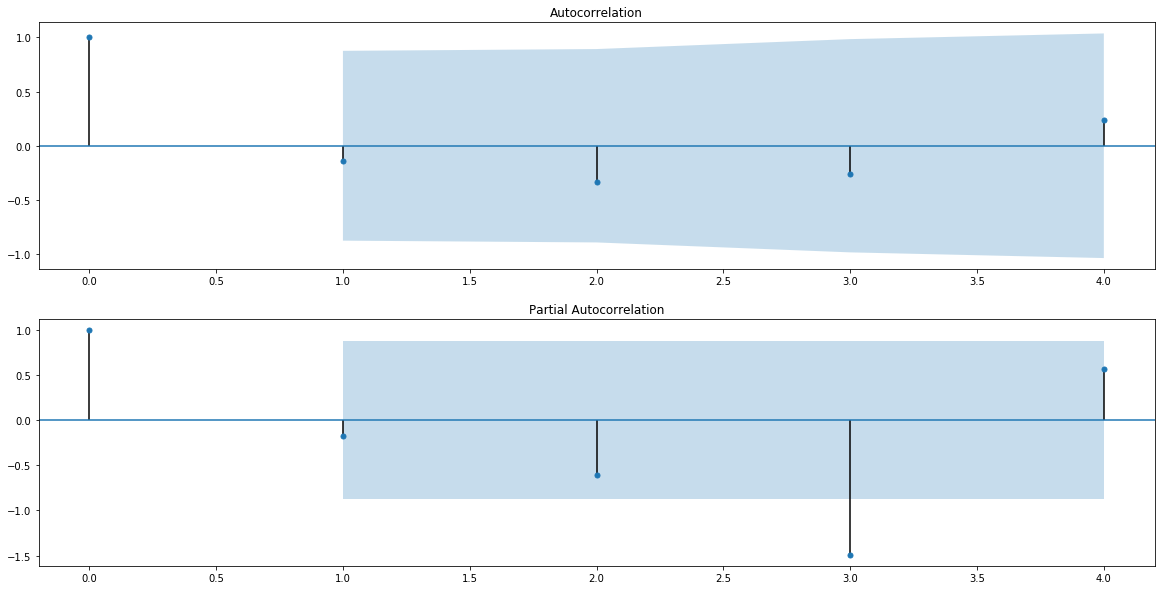

In [9]:
df = csv_array[people][seed][csv][area].copy()
ts_origin = np.float64(df['y'])
# df = df[:-1]
ts = np.float64(df['y'][:-1])
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_acf(ts, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(ts, ax=ax2)

In [10]:
info_criteria = sm.tsa.stattools.arma_order_select_ic(
                    ts, ic=['aic', 'bic']
                )
print(info_criteria.aic_min_order)
print(info_criteria.bic_min_order)

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:765: RuntimeWarning: divide by zero encountered in log
  return np.log(self.sigma2) + (1 + self.df_model) * np.log(nobs)/nobs
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/ts

(0, 0)
(0, 1)


/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/

In [11]:
arma_aic = sm.tsa.ARMA(ts, info_criteria.aic_min_order).fit()
print('ARMA{0}: AIC = {1:.2f}'.format(info_criteria.aic_min_order, arma_aic.aic))

ARMA(0, 0): AIC = 69.62


In [12]:
arma_aic_inpred = arma_aic.predict(start=0, end=4)
arma_aic_outpred = arma_aic.predict(start=0, end=5)

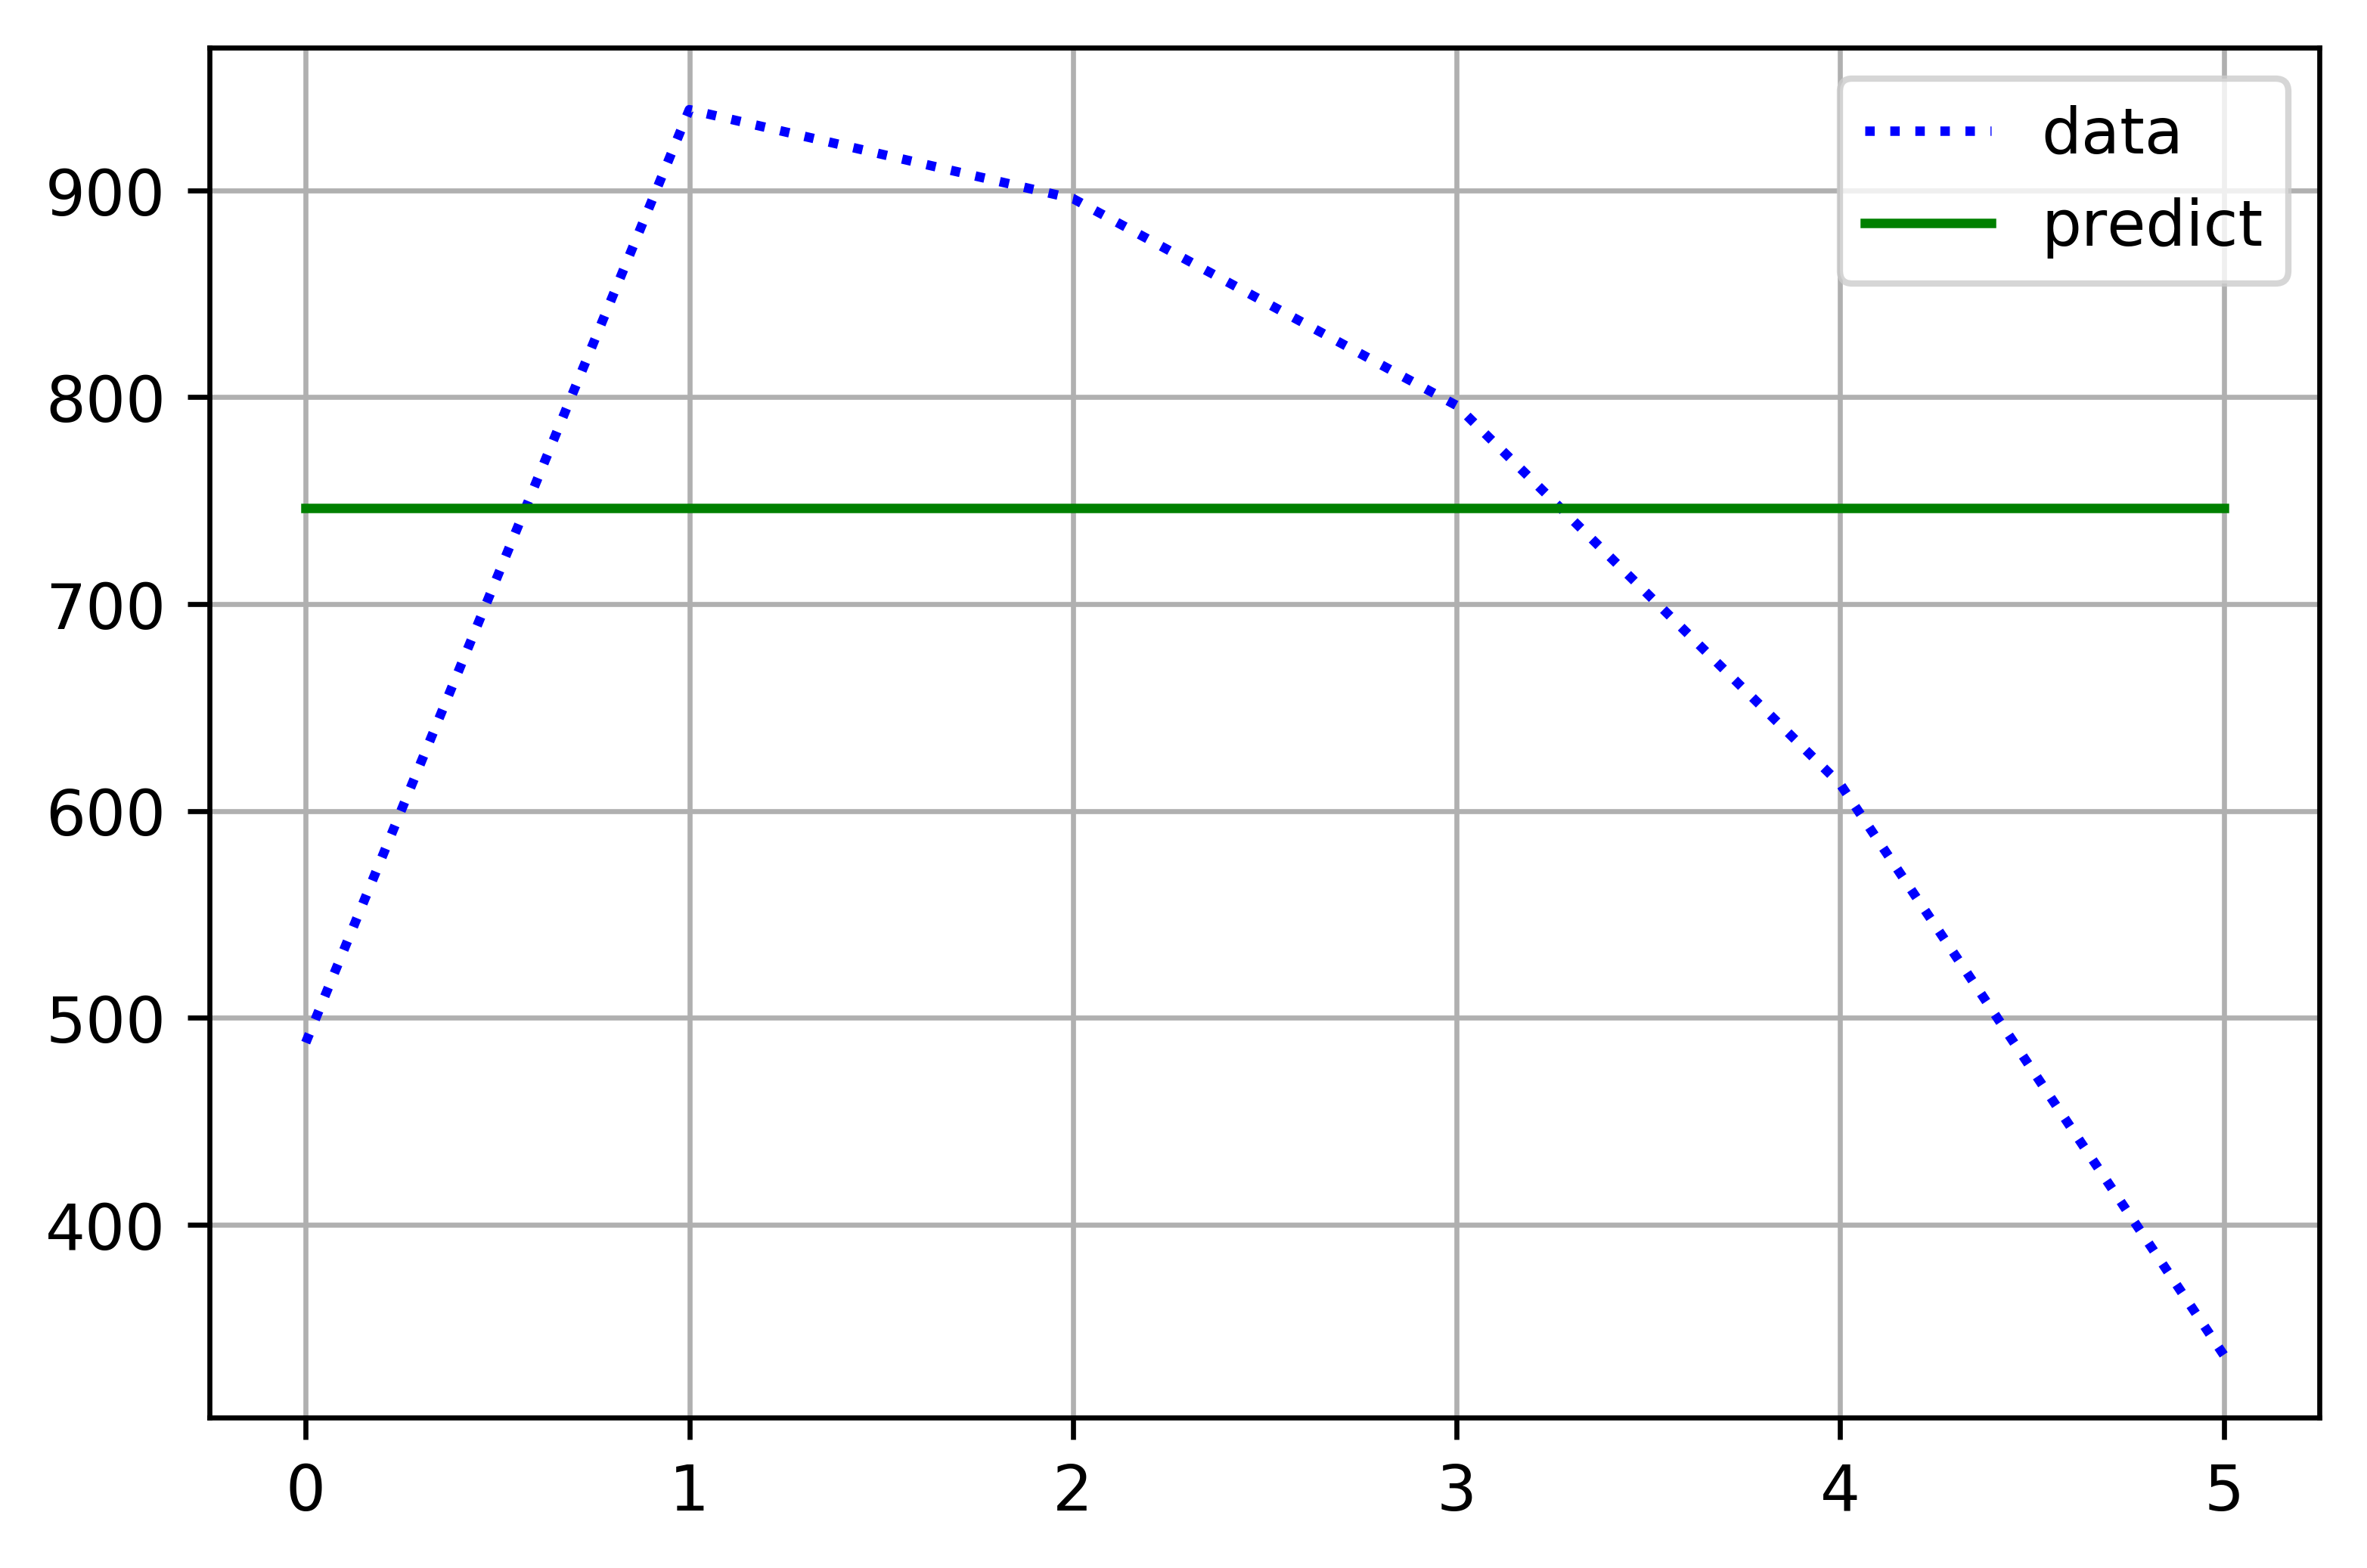

In [13]:
def plot_ARMA_results(origin_data, aic_pred_in, aic_pred_out):
    plt.figure(dpi=600)
    plt.plot(origin_data, 'b:', label='data')

#     plt.plot(aic_pred_in, 'g')
#     plt.plot(bic_pred_in, 'c')

    plt.plot(aic_pred_out, 'g', label='predict')
#     plt.plot(bic_pred_out, 'c', label='bic')

    plt.legend()
    plt.grid(True)
    plt.savefig('ARMA440_mobile.png')

plot_ARMA_results(ts_origin, arma_aic_inpred, arma_aic_outpred)

In [14]:
show_evaluation(ts_origin, arma_aic_outpred)

AE 1193.0
MAE 198.83333333333334
MSE 52351.593333333316
MCE 1.0
RMSE 228.80470566256568
RMSPE 31.289929056115657
RMSLE 0.3954634777422242
